# Overview

This week we'll talk about some of the charachteristics of real-world social networks. The structure is the following: 

* Part 1: A crash course on real-world social networks.
* Part 2: Visualizing the network of Computational Social Scientists
* Part 3: Properties of the real-world network of Computational Social Scientists


> *Reading*: Read [Chapter 3 of the Network Science book.](http://networksciencebook.com/chapter/3). The most important sections are 3.1 to 3.4 and 3.8 to 3.10, so focus on that.

# Part 1 : Empirical properties of real-world social networks

Researchers in Computational Social Science have widely studied the properties of real-world social networks. The very cool thing they found is that many widely different social networks (from face-to-face interactions among classmates, to the Facebook network, to collaboration networks among scientists, etc) present some commonalities. We refer to those as 'Universalities'.
In the video-lecture below, I will introduce _some_ of the things we know to be true for most real-world social networks. 

>> **_Video Lecture_**. Start by watching the ["Properties of empirical social networks"](https://youtu.be/jHdnehLku54). 


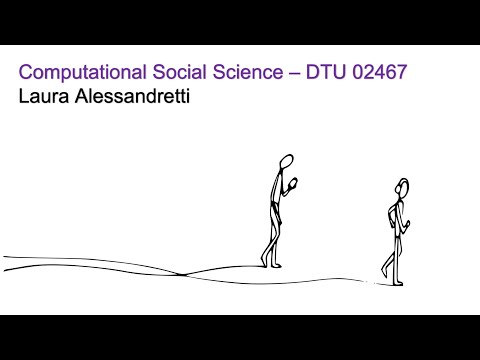

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("jHdnehLku54",width=800, height=450)

> *Exercise 1:* Did you really read the text? Answer the following questions (no calculations needed) in your Jupyter notebook.

> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of ⟨k⟩.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

# Part 2 : Visualizing the network of Computational Social Scientists

Take the network of Computational Social Scientists you built in Week4.
To get an idea about how the network looks like, we start visualizing it. For this exercise, we will use the __awesome library [``netwulf``](https://netwulf.readthedocs.io/en/latest/index.html)__ created by Ulf Aslak and Ben Maier, two colleagues of mine. 
You can install it via ``pip install netwulf``. 

Netwulf is built on top of [d3-force](https://github.com/d3/d3-force), a Javascript library that simulates the dynamics of particles moving in 2D. In the visualization, particles correspond to network nodes subject to forces:
 * Nodes are attracted to the center of the viz 
 * Nodes repel each other
 * Nodes linked by an edge will preferably stay at a fixed distance to each other.

Come and ask me if you want to know more!

> _Exercise_ 1: Visualize the network of Computational Social scientists. 
>
> * Extract the [largest connected components](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html) from your network. 
> * Visualize the largest connected component using the function [``visualize``](https://netwulf.readthedocs.io/en/latest/reference/interactive.html?highlight=visualize#netwulf.interactive.visualize) of the Netwulf package. 
> * Play with the parameters of the netwulf algorithm to obtain a visualization you like. To understand better what the parameters mean, have a look at the [documentation](https://netwulf.readthedocs.io/en/latest/visualization/init.html?). Your visualization may look similar to the one below, where I made the size of nodes proportional to their strength (sum of weights of incoming edges), and I added the names of the top Computational Social Scientists by degree... But not necessarily! Just have fun making your own version. You can save the figure directly from the interactive visualization panel, or plot it in higher resolution in matplotlib following [this example](https://netwulf.readthedocs.io/en/latest/cookbook/cookbook.html#save-as-pdf).
> * Describe the structure you observe. Can you identify nodes with a privileged position in the network? 
> * _Optional_: You can color nodes based on a property of your interest. For example, I colored nodes based on the top discipline, following [this example](https://github.com/benmaier/netwulf/issues/38). What do you observe? Can you find specific nodes properties that seem to correlate with a node's position in the network?

<img src="https://github.com/lalessan/comsocsci2023/raw/master/figures/network.png" alt="Drawing" style="width: 800px;"/>

In [2]:
import pickle 
import numpy as np
import pandas as pd
import networkx as nx
import netwulf as nw


author_data = pd.read_csv('../author_data.csv')
author_data.head()

    

,ids,names,aliases,citationCount,field
0,2773799,A. Filisetti,"['A Filisetti', 'Alessandro Filisetti']",631,Biology
1,1399712184,S. Cohen-Boulakia,"['S Cohen-boulakia', 'Sarah Cohen‐boulakia', '...",757,Computer Science
2,50197963,J. Ludwig,"['J. Ludwig', 'Jens Ludwig']",11446,Economics
3,3530609,L. Dutra,"['Lívia Macedo Dutra', 'Lívia M. Dutra', 'Lívi...",477,Chemistry
4,84242025,Annelies E. M. van Vianen,"['Annelies Elizabeth Maria Van Vianen', 'Annel...",2035,Psychology


In [3]:
author_data['ids'] = author_data['ids'].astype(str)
author_data['field'] = author_data['field'].astype(str)

In [4]:
with open('CSS.pkl', 'rb') as f:
    G = pickle.load(f)

In [5]:
nw.visualize(G)

(None, None)

In [6]:
names_init = dict(zip(list(G.nodes), ['unknonwn']*len(list(G.nodes))))
fields_init = dict(zip(list(G.nodes), ['unknonwn']*len(list(G.nodes))))
names = dict(author_data[["ids","names"]].values)
names_init.update(names)
fields = dict(author_data[["ids","field"]].values)
fields_init.update(fields)
nx.set_node_attributes(G, names_init, 'name')
nx.set_node_attributes(G, fields_init, 'field')

In [ ]:
fields

{'2773799': 'Biology',
 '1399712184': 'Computer Science',
 '50197963': 'Economics',
 '3530609': 'Chemistry',
 '84242025': 'Psychology',
 '2931137': 'Biology',
 '52278908': 'Computer Science',
 '79604936': 'Medicine',
 '1774221': 'Computer Science',
 '1661057657': 'Biology',
 '3376613': 'Psychology',
 '144327496': 'Economics',
 '12896311': 'Psychology',
 '13314950': 'Medicine',
 '2071524389': 'Psychology',
 '7555661': 'Education',
 '31384989': 'Engineering',
 '49361540': 'Art',
 '2065362430': 'Materials Science',
 '1681853': 'Business',
 '2474463': 'Biology',
 '5522902': 'Education',
 '1411830334': 'Psychology',
 '2065223957': 'Business',
 '2051584284': 'Medicine',
 '2059407446': 'Education',
 '40478606': 'Biology',
 '1936964': 'Physics',
 '49916135': 'Physics',
 '152457254': 'Sociology',
 '117656902': 'Physics',
 '50778658': 'Art',
 '2073003810': 'Medicine',
 '13875073': 'Medicine',
 '145941081': 'Computer Science',
 '49198638': 'Computer Science',
 '49095156': 'Agricultural And Food S

In [8]:
test1 = nx.get_node_attributes(G, 'field')
#test2 = nx.get_node_attributes(G, 'field2')
test1

{'1398627592': 'unknonwn',
 '144562407': 'Physics',
 '2060837062': 'unknonwn',
 '31517266': 'unknonwn',
 '4331724': 'unknonwn',
 '91015314': 'unknonwn',
 '4599086': 'unknonwn',
 '46351403': 'unknonwn',
 '2082324637': 'unknonwn',
 '47717878': 'unknonwn',
 '1964030928': 'unknonwn',
 '2057087436': 'Psychology',
 '4543142': 'unknonwn',
 '5427387': 'unknonwn',
 '4391310': 'unknonwn',
 '51477263': 'unknonwn',
 '2122607910': 'unknonwn',
 '2186155276': 'unknonwn',
 '1805545': 'Computer Science',
 '66668960': 'unknonwn',
 '1485004000': 'unknonwn',
 '1729247675': 'Psychology',
 '1729470864': 'unknonwn',
 '1943370': 'Psychology',
 '1398514748': 'unknonwn',
 '22211632': 'unknonwn',
 '1877662': 'unknonwn',
 '2124442888': 'unknonwn',
 '1955727': 'Computer Science',
 '80273596': 'unknonwn',
 '15703048': 'Psychology',
 '38049428': 'unknonwn',
 '3007050': 'Medicine',
 '5445728': 'Medicine',
 '3877237': 'Medicine',
 '4376787': 'unknonwn',
 '36205933': 'unknonwn',
 '90841871': 'Medicine',
 '1392941586': 

In [10]:
with open('CSS_name_field.pkl', 'wb') as f:
    pickle.dump(G, f)


In [ ]:
nw.visualize(G)

(None, None)

In [ ]:
cc = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
S = G.subgraph(max(nx.connected_components(G), key=len)).copy()

# Part 3: Properties of the real-world network of Computational Social Scientists


> _Exercise 2_: 
>
> 2.1 _Random Network_: In this exercise we will create a Random Network as a ["null model"](https://en.wikipedia.org/wiki/Null_model) to investigate some properties of the Computational Social Scientists Network.
> * Compute the value of _p_ such that the number of expected edges of the random network equals the number of edges in the Computational Social Scientists network (see equation 3.2 in your Network Science Book). What is the value of p? Compute the average value of the degree < k > (using the formula).
> * Create a Random network with the same number of nodes as the Computational Social Scientists networks, and _p_ as computed above. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.  
> * Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below). Comment on the differences between the two.
>
> 2.2 _Degree Distribution_: In this exercise, we will compare the degree distribution of the real network and its random counterpart.
> * Compute the distribution of degree for the random network using the numpy function ``np.histogram``. Bin your histogram using 10 linearly spaced bins. Remember to pass the parameter ``density=True``.
> * Compute the distribution of degree for the Computational Social Scientists network using the numpy function ``np.histogram``. Bin your histogram using 10 logarithmically spaced bins. Remember to pass the parameter ``density=True``.
> * Plot the two distributions you computed in steps 1. and 2. in the same figure as two line-graphs. Log-scale the x and y axes. 
> * Comment the figure. What are the differences between the two distributions? Why did I ask you to use two different types of binning? 
> * What is the average degree of the random and the real network? Comment on the relation between the two. 
>
> 2.3 _Shortest Paths_: Here, we will check if the Computational Social Scientists Network is a small-world Network.
> * Compute the average shortest path for the largest connected component of the Computational Social Scientists network (for a reminder of the definition of connected components, check [section 2.9 of the Network Science book](http://networksciencebook.com/chapter/2#connectedness)). You can use the following steps: 
>    * Use [``nx.algorithms.connected_components``](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.components.connected_components.html) to find all connected components (it returns a list of subsets of the original set of nodes). 
>    * Consider the largest subset of nodes found in the step above. Build the subgraph of your original network containing those nodes exclusively, using [``nx.Graph.subgraph``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). This corresponds to your largest connected component (a.k.a [giant component](https://en.wikipedia.org/wiki/Giant_component)).
> * Compute the average shortest path length of the giant component using [``nx.average_shortest_path_length``](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html)
> * Compute the average shortest path length for the giant component of the random network you built in exercise 2.1.
> * Comment on the relation between the average shortest path length in the real and the random networks. Can you conclude that the small-world property apply to the Computational Social Scientists network? 
>
> 2.4 _Clustering_: Here, we will compare the clustering coefficient in the Computational Social Scientists Network and its random counterpart.
> * Compute the clustering coefficient for all nodes in the random network, using the formula 2.15 in your book. **Hint**: To check your method, you can compare your results with those obtained using the networkx [``clustering``](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering) function. 
> * Compute the average clustering across nodes of the random network. Is it consistent with the analytical prediction (network science book equation 3.21)?
> * Compute the average clustering coefficient for the Computational Social Scientists network. How does it compare to its random counterpart? Is it something you would expect? Why?


<img src="https://github.com/lalessan/comsocsci2021/raw/master/files/random_network.png" alt="Drawing" style="width: 800px;"/>